# Lecture 5 - EEP 118 Spring 2020

This is the notebook for Lecture 5 where we will see how coefficients and R Squared change when the sample size in the data increases when we run a linear least squares regression estimation procedure, like we did in Lecture 5 using R

In [7]:
#-------------------------------------------
#install needed R packages
#you will learn this in Sections
#you only need to install them once then only call them using library()
#make sure the packages are loaded onto the srever for students to us them
#-------------------------------------------
#for OLS linear regression model install below
install.packages("lmSupport")
#for summary stats install below
install.packages("psych")
#for scatter plots etc install ggplot2
install.packages("ggplot2")
#call them in
library(lmSupport)
library(psych)
library(ggplot2)


also installing the dependencies ‘stringr’, ‘zip’, ‘stringi’, ‘reshape2’, ‘RcppArmadillo’, ‘openxlsx’, ‘unmarked’, ‘rio’, ‘nloptr’, ‘AICcmodavg’, ‘car’, ‘lme4’, ‘pbkrtest’

Warning message in install.packages("lmSupport"):
“installation of package ‘zip’ had non-zero exit status”Warning message in install.packages("lmSupport"):
“installation of package ‘stringi’ had non-zero exit status”Warning message in install.packages("lmSupport"):
“installation of package ‘RcppArmadillo’ had non-zero exit status”Warning message in install.packages("lmSupport"):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("lmSupport"):
“installation of package ‘stringr’ had non-zero exit status”Warning message in install.packages("lmSupport"):
“installation of package ‘openxlsx’ had non-zero exit status”Warning message in install.packages("lmSupport"):
“installation of package ‘lme4’ had non-zero exit status”Warning message in install.packages("lmSupport"):
“install

ERROR: Error in library(lmSupport): there is no package called ‘lmSupport’


In [13]:
install.packages("data.table")
library(data.table)
install.packages("dplyr")
library(dplyr)
install.packages("haven")
library(haven)
install.packages("tidyverse")
library(tidyverse)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘sys’, ‘ps’, ‘highr’, ‘markdown’, ‘askpass’, ‘processx’, ‘knitr’, ‘yaml’, ‘tinytex’, ‘xfun’, ‘generics’, ‘reshape2’, ‘DBI’, ‘mime’, ‘openssl’, ‘callr’, ‘fs’, ‘rmarkdown’, ‘whisker’, ‘selectr’, ‘stringi’, ‘broom’, ‘dbplyr’, ‘ggplot2’, ‘httr’, ‘lubridate’, ‘modelr’, ‘reprex’, ‘rstudioapi’, ‘rvest’, ‘stringr’, ‘tidyr’, ‘xml2’

Warning message in install.packages("tidyverse"):
“installation of package ‘ps’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘fs’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘stringi’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘processx’ h

ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


Read the data into R

In [19]:
#-------------------------------------------
#1. Read in data and see the top rows to see column names etc
#-------------------------------------------
my_data <- read.csv("Lecture5.csv")
head(my_data)

county,year,crmrte,polpc
1,81,0.0398849,0.0017868
1,82,0.0383449,0.0017666
1,83,0.0303048,0.0018358
1,84,0.0347259,0.0018859
1,85,0.0365730,0.0019244
1,86,0.0347524,0.0018952


Keep only year 87 , save as data2 dataframe, and redo Lecture 4

In [20]:
my_data2 <- my_data[my_data$year ==87,] 
head(my_data2)

,county,year,crmrte,polpc
7,1,87,0.0356036,0.0018279
14,3,87,0.0152532,0.0007459
21,5,87,0.0129603,0.0012343
28,7,87,0.0267532,0.0015299
35,9,87,0.0106232,0.0008602
42,11,87,0.0146067,0.0028820


Scatter Plot of Crime Rate and Police Per Capita for Year 1987 only N=90

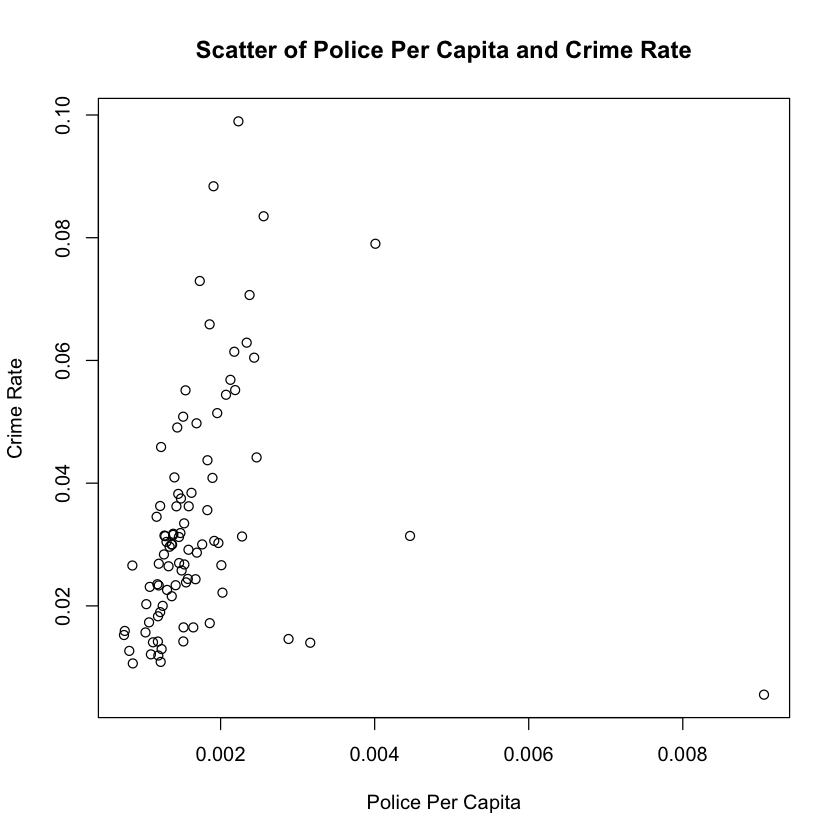

In [38]:
fig1<-plot(my_data2$polpc,my_data2$crmrte, main="Scatter of Police Per Capita and Crime Rate",
                     xlab="Police Per Capita", ylab="Crime Rate")

Regression of Crime Rate on Police Per Capita for Year 1987 only N=90

In [22]:
#regression
regLecture4 <- lm(crmrte ~ polpc,my_data2)
#show output
summary(regLecture4)


Call:
lm(formula = crmrte ~ polpc, data = my_data2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.051400 -0.011799 -0.003837  0.006455  0.063787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02806    0.00395   7.105 2.99e-10 ***
polpc        3.18839    2.00318   1.592    0.115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01873 on 88 degrees of freedom
Multiple R-squared:  0.02798,	Adjusted R-squared:  0.01694 
F-statistic: 2.533 on 1 and 88 DF,  p-value: 0.115


Generate Predicted Crime Rate using b0 and b1 estimates of the regression you estimated

In [25]:
#predicted crime rate
my_data2$crmrte_hat <- regLecture4$fitted.values

Plot Crime Rate and Predicted Crime Rate to see how well we are doing

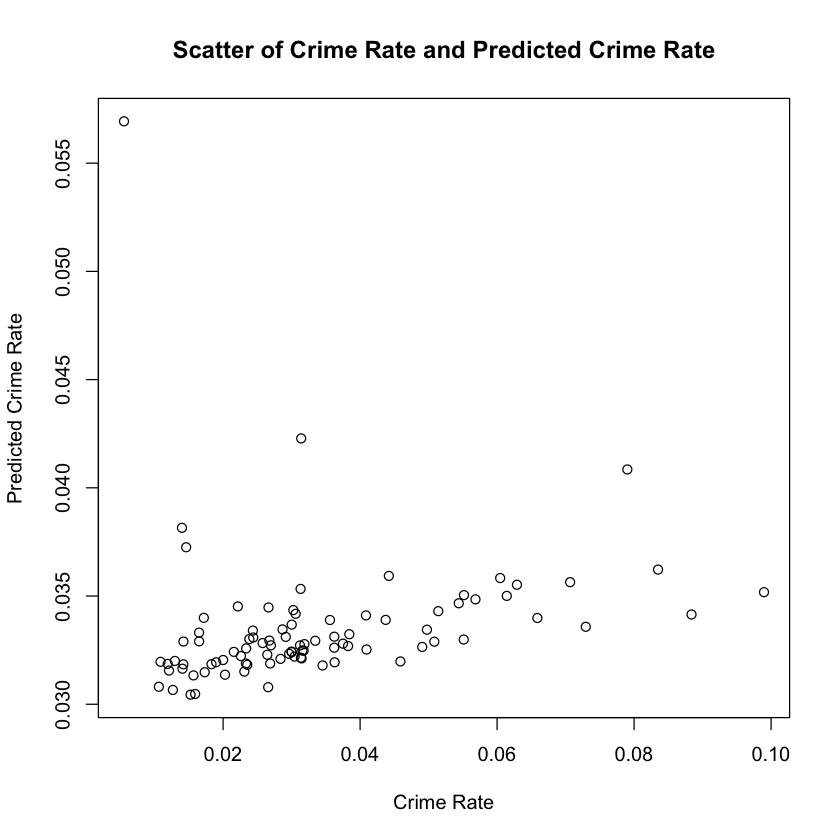

In [37]:
#plot(my_data2$crmrte[,"Crime Rate"],my_data2$crmrte_hat[,"Predicted Crime Rate"])
fig2<-plot(my_data2$crmrte,my_data2$crmrte_hat, main="Scatter of Crime Rate and Predicted Crime Rate",
                     xlab="Crime Rate", ylab="Predicted Crime Rate")


Get regression line estimates and police per capita graph

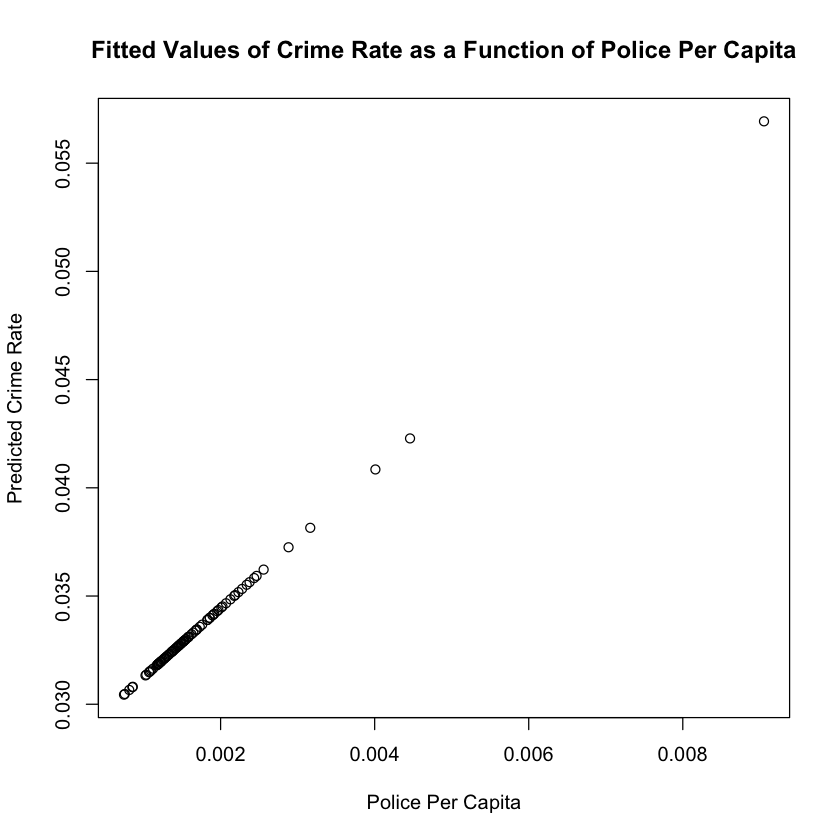

In [39]:
fig1<-plot(my_data2$polpc,my_data2$crmrte_hat, 
    main="Fitted Values of Crime Rate as a Function of Police Per Capita",
    xlab="Police Per Capita", ylab="Predicted Crime Rate")

Use now the full sample N=630

In [40]:
#regression
regLectureN630 <- lm(crmrte ~ polpc,my_data)
#show output
summary(regLectureN630)


Call:
lm(formula = crmrte ~ polpc, data = my_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045791 -0.012476 -0.002669  0.007157  0.098927 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0292403  0.0008673  33.713  < 2e-16 ***
polpc       1.2246077  0.2598397   4.713 3.01e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01782 on 628 degrees of freedom
Multiple R-squared:  0.03416,	Adjusted R-squared:  0.03262 
F-statistic: 22.21 on 1 and 628 DF,  p-value: 3.009e-06


Compare standard errors from reg using N=90 with Standard errors from N=630

In [41]:
summary(regLecture4)


Call:
lm(formula = crmrte ~ polpc, data = my_data2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.051400 -0.011799 -0.003837  0.006455  0.063787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02806    0.00395   7.105 2.99e-10 ***
polpc        3.18839    2.00318   1.592    0.115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01873 on 88 degrees of freedom
Multiple R-squared:  0.02798,	Adjusted R-squared:  0.01694 
F-statistic: 2.533 on 1 and 88 DF,  p-value: 0.115


Comparing the regression output of N=630 with the one for N=90 you can see, for Police Per Capita's beta_hat, that SE is 2.00318 with N=90 and is 0.259 for N=630. so SE dropped a lot when N increased from 90 to 630.